<h1>Capstone Data Science Project Notebook</h1> 

<h2> I. Introduction/Business Problem</h2>

<p>In the United States, traffic accidents involving motor vehicles cause over 100 deaths per day, and are leading cause of death in the US, as reported by the Center for Desease Control and Prevention <a href="https://www.cdc.gov/motorvehiclesafety/costs/index.html">(CDC)</a>. In addition to the cost of human life, there is an enourmous impact economic impact as well, which exceeds $75 billion for the cost of related productivity losses and medical care.</p>  
<p>This project seeks to explor a range of factors that may affect the severity of automobile accidents. For the purpost of this project, and given the 3rd-party data used for analysis, "severity" is to be understood as the impact on the traffic as measuresd by the lenght of the traffic delay casued by the accident. Insights from this project would be particularly useful to city transportation, safety, and zoning departments.</p> 
<p>By understanding what factors contribute to more severe accidents, city officials would be able to plan better and safer cities, and more effectively deploy city resources in response to traffic accidents. If there are patterns to location, weather condition, and points of interest around traffic accidents, then city officials would be better able to address this and related issues.</p>

<h2> II. Data</h2>

<p>The data being used for this project is from a dataset made available through the research from the following papers:</p>
  <ul>
    <li>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).</li>
    <li>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.</li>
  </ul>
<p>The data was collected between February 2016 and June 2020, includes approximately 3.5 million traffic accidents, and was collected from 49 states in the US. The dataset includes attributes that detail:</p>
  <ul>
    <li>weather conditions (i.e. temperature, precipitation, wind speed, etc.),</li>
    <li>location information (i.e., coordinates, street address, city, state),</li>
    <li>points of interest nearby the traffic accident (i.e., crossing, speed bump, station, railway, stop, traffic signal),</li> 
  </ul>
<p>and other attributes pertaining to the observed traffic accidents.</p>


<h3>II.a Importing and Cleaning</h3>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import pylab as pl
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from scipy import stats
%matplotlib inline
from sklearn import preprocessing

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
pwd

'/Users/zacharystrain/github/datascience_certification/scripts'

In [3]:
df = pd.read_csv("US_Accidents_June20.csv")
print("file read to dataframe")

file read to dataframe


In [4]:
df.drop(['ID', 'TMC', 'Description', 'Number', 'Street', 'Side', 'City', 'Country','Timezone', 'Airport_Code', 'Weather_Timestamp', 'Turning_Loop'], axis=1, inplace=True)
print('dropped boring columns')

dropped boring columns


<p>For the sake of memory, I've dropped a few columns that were discovered to be empty, or which ultimatly did not fit into my feature set(s).</p>

<h3>Dropping missing data</h3>

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),County,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Source
False    3513617
Name: Source, dtype: int64

Severity
False    3513617
Name: Severity, dtype: int64

Start_Time
False    3513617
Name: Start_Time, dtype: int64

End_Time
False    3513617
Name: End_Time, dtype: int64

Start_Lat
False    3513617
Name: Start_Lat, dtype: int64

Start_Lng
False    3513617
Name: Start_Lng, dtype: int64

End_Lat
True     2478818
False    1034799
Name: End_Lat, dtype: int64

End_Lng
True     2478818
False    1034799
Name: End_Lng, dtype: int64

Distance(mi)
False    3513617
Name: Distance(mi), dtype: int64

County
False    3513617
Name: County, dtype: int64

State
False    3513617
Name: State, dtype: int64

Zipcode
False    3512548
True        1069
Name: Zipcode, dtype: int64

Temperature(F)
False    3447885
True       65732
Name: Temperature(F), dtype: int64

Wind_Chill(F)
True     1868249
False    1645368
Name: Wind_Chill(F), dtype: int64

Humidity(%)
False    3443930
True       69687
Name: Humidity(%), dtype: int64

Pressure(in)
False    3457735
True

In [7]:
#  drop whole row with NaN in column
df.dropna(subset=["Temperature(F)", "Wind_Speed(mph)", "Visibility(mi)", "Humidity(%)", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight" ], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [8]:
df.drop(['Wind_Direction', 'Pressure(in)', 'Wind_Chill(F)'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036405 entries, 0 to 3036404
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   County                 object 
 10  State                  object 
 11  Zipcode                object 
 12  Temperature(F)         float64
 13  Humidity(%)            float64
 14  Visibility(mi)         float64
 15  Wind_Speed(mph)        float64
 16  Precipitation(in)      float64
 17  Weather_Condition      object 
 18  Amenity                bool   
 19  Bump                   bool   
 20  Crossing               bool   
 21  Give_Way               bool   
 22  Junction          

<p>Since traffic laws, among other factors not included in the dataset, differ by state, my analysis will focus on just one: Texas, for which there is ample data. 

In [10]:
df['State'] = df['State'].astype("str")

In [11]:
df = df[(df.State=="TX")]

In [12]:
df.shape

(290975, 34)

In [13]:
df['Severity'].value_counts().to_frame()

,Severity
2,206326
3,79361
4,4229
1,1059


In [14]:
pd.crosstab(df.Severity,df.Source,margins=True)

Source,Bing,MapQuest,MapQuest-Bing,All
Severity,,,,
1,935,124,0,1059
2,19846,185878,602,206326
3,17610,60911,840,79361
4,3710,516,3,4229
All,42101,247429,1445,290975


<p>As illustrated in the table above, there's a striking difference in distribution of Severity levels between Bing and Mapquest. For that reason, I'll focus on the Bing data.</p>

In [15]:
df['Source'] = df['Source'].astype("str")

In [16]:
df = df[(df.Source=="Bing")]

In [17]:
df.shape

(42101, 34)

<p>So after the main cleaning of the data, I'm left with 42,101 rows.</p>

<h2>Exploring the data</h2>

<h4>Length of Delay</h4>

<p>In order to better understand the outcome variable, Severity, which is supposed to be positively correlated with the length of the delay caused by the traffic accident, let's see if we can calculate the actual delay of each accident using the Start_Time and End_Time variables.</p>

In [18]:
df['start'] = pd.to_datetime(df['Start_Time'])

In [19]:
df['end'] = pd.to_datetime(df['End_Time'])
df[['start', 'end']].head()

,start,end
2129313,2016-11-30 15:29:48,2016-11-30 21:29:48
2129314,2016-11-30 15:41:16,2016-11-30 21:41:16
2129315,2016-11-30 15:15:48,2016-11-30 21:15:48
2129319,2016-11-30 16:16:05,2016-11-30 22:16:05
2129320,2016-11-30 16:16:05,2016-11-30 22:16:05


In [20]:
df['delay'] = df['end'] - df['start']
df[['start', 'end', 'delay']].head()

,start,end,delay
2129313,2016-11-30 15:29:48,2016-11-30 21:29:48,06:00:00
2129314,2016-11-30 15:41:16,2016-11-30 21:41:16,06:00:00
2129315,2016-11-30 15:15:48,2016-11-30 21:15:48,06:00:00
2129319,2016-11-30 16:16:05,2016-11-30 22:16:05,06:00:00
2129320,2016-11-30 16:16:05,2016-11-30 22:16:05,06:00:00


In [21]:
df['delay'].describe()

count                     42101
mean     0 days 03:45:55.224935
std      0 days 06:00:38.295668
min             0 days 00:06:36
25%             0 days 00:29:43
50%             0 days 06:00:00
75%             0 days 06:00:00
max            32 days 04:14:47
Name: delay, dtype: object

<p>Based on the above description of the new delay variable, the average accident (in Texas) causes a delay of about three hours and 45 minutes, with a maximum delay of over 32 days, and a minimum of just six and a half minutes.</p><br>
<p>Next, I convert the timedelta object into an interger so it can be included in the feature set and modelled with the rest of the data. The unit of measure, as indicated by the new variable, is in minutes.</p>

In [22]:
df['delay_minutes'] = df['delay'].astype(int)/1000000000/60
df['delay_minutes'].describe()

count    42101.000000
mean       225.920416
std        360.638261
min          6.600000
25%         29.716667
50%        360.000000
75%        360.000000
max      46334.783333
Name: delay_minutes, dtype: float64

In [23]:
df_del_sev_group = df[['delay_minutes', 'Severity']]
df_del_sev_group = df_del_sev_group.groupby(['Severity'],as_index=False).mean()
df_del_sev_group

,Severity,delay_minutes
0,1,49.694777
1,2,260.646633
2,3,200.026573
3,4,207.479721


<p>Calculating the mean delay in minutes by Severity, we see that there may not be not a linear relationship between delay and Severity. Accidents with a Severity level of 2 have the longest delay of approximately 260 minutes, while the most severe (4) has an average of 207 mintutes. Therefore, I will remove any notable outliers (i.e. the 32-day delay) by creating a max threshold for the delay data.</p>

In [24]:
df['delay_minutes'].max()

46334.78333333333

In [25]:
max_threshold = df['delay_minutes'].quantile(0.9999)
max_threshold

4162.243999994471

In [26]:
df[df['delay_minutes']>max_threshold].describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),delay,delay_minutes
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,2.000000,5,5.000000
mean,3.800000,31.413456,-96.937576,31.411182,-96.953432,0.961400,70.960000,73.400000,8.40000,11.220000,0.005000,15 days 01:34:16.400000,21694.273333
std,0.447214,2.502914,2.924148,2.504501,2.921614,0.496206,18.783051,23.712866,1.67332,5.683485,0.007071,15 days 15:00:20.082638,22500.334711
min,3.000000,29.680890,-102.057710,29.678910,-102.069680,0.676000,45.000000,36.000000,6.00000,5.800000,0.000000,3 days 00:23:36,4343.600000
25%,4.000000,29.699690,-96.692200,29.695690,-96.704670,0.733000,57.000000,65.000000,8.00000,5.800000,0.002500,3 days 22:59:42,5699.700000
50%,4.000000,29.699690,-95.373190,29.695690,-95.403850,0.776000,82.900000,85.000000,8.00000,10.400000,0.005000,3 days 23:59:22,5759.366667
75%,4.000000,32.795750,-95.282390,32.794080,-95.294480,0.776000,82.900000,85.000000,10.00000,16.100000,0.007500,32 days 04:13:55,46333.916667
max,4.000000,35.191260,-95.282390,35.191540,-95.294480,1.846000,87.000000,96.000000,10.00000,18.000000,0.010000,32 days 04:14:47,46334.783333


In [27]:
min_threshold = df['delay_minutes'].quantile(0.0001)
min_threshold

10.986833333333333

In [28]:
df = df[(df.delay_minutes<max_threshold)]
df.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),County,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start,end,delay,delay_minutes
2129313,Bing,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,32.81833,-96.78806,1.915,Dallas,...,False,False,Day,Day,Day,Day,2016-11-30 15:29:48,2016-11-30 21:29:48,06:00:00,360.0
2129314,Bing,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,32.84640,-96.63711,0.021,Dallas,...,False,False,Day,Day,Day,Day,2016-11-30 15:41:16,2016-11-30 21:41:16,06:00:00,360.0
2129315,Bing,3,2016-11-30 15:15:48,2016-11-30 21:15:48,32.86693,-96.66617,32.86156,-96.65769,0.616,Dallas,...,False,False,Day,Day,Day,Day,2016-11-30 15:15:48,2016-11-30 21:15:48,06:00:00,360.0
2129319,Bing,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.79385,-96.70278,32.79498,-96.69424,0.502,Dallas,...,False,False,Day,Day,Day,Day,2016-11-30 16:16:05,2016-11-30 22:16:05,06:00:00,360.0
2129320,Bing,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.85710,-96.77046,32.84623,-96.77330,0.769,Dallas,...,False,True,Day,Day,Day,Day,2016-11-30 16:16:05,2016-11-30 22:16:05,06:00:00,360.0


In [29]:
df.shape

(42096, 38)

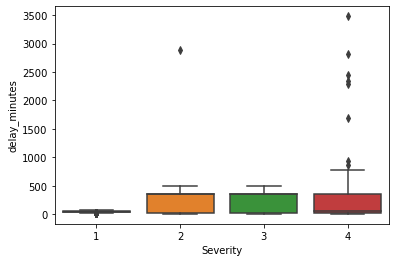

In [30]:
sns.boxplot(x='Severity', y='delay_minutes', data=df)

In [31]:
df_del_sev_group = df[['delay_minutes', 'Severity']]
df_del_sev_group = df_del_sev_group.groupby(['Severity'],as_index=False).mean()
df_del_sev_group

,Severity,delay_minutes
0,1,49.694777
1,2,260.646633
2,3,199.714251
3,4,179.972504


<p>There still doesn't appear to be a linear relationship between the delay caused by an accident and the severity level.</p>

<p>Let's convert Severity into a binary where 0=[1,2], and 1=[3,4] so we can run a logistic regression and avoid ordinal logistic regression</p>

In [32]:
df['Severity'].replace(to_replace=[1, 2, 3, 4], value=[0,0,1,1],inplace=True)

In [33]:
df['Severity'].value_counts()

1    21315
0    20781
Name: Severity, dtype: int64

In [34]:
df_del_sev_group = df[['delay_minutes', 'Severity']]
df_del_sev_group = df_del_sev_group.groupby(['Severity'],as_index=False).mean()
df_del_sev_group

,Severity,delay_minutes
0,0,251.155272
1,1,196.281790


In [35]:
pearson_coef, p_value = stats.pearsonr(df['delay_minutes'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.16629343020203846  with a P-value of P = 1.09218046193679e-258


<p>So while the delay is negatively correlated with the new outcome variable (Severity as a binary where 0 = [1,2], and 1 = [3, 4]), it is still statistically significant.</p>

<h4>Frequency and severity of accidents by day and hour</h4>

In [36]:
df['dayofweek'] = df['start'].dt.dayofweek

In [37]:
df['dayofweek'].value_counts()

4    7809
3    7761
1    7673
2    7346
0    7010
5    2516
6    1981
Name: dayofweek, dtype: int64

In [38]:
day_count = df['dayofweek'].value_counts().to_frame()

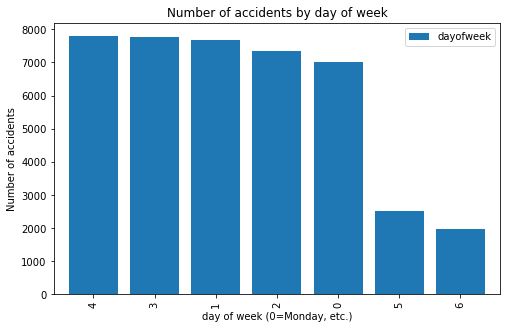

In [39]:
day_count.plot(kind='bar', width=0.8, figsize=(8, 5))

plt.title('Number of accidents by day of week')
plt.ylabel('Number of accidents')
plt.xlabel('day of week (0=Monday, etc.)')

plt.show()

<p>As seen in the figure above, most accidents happen during weekdays, with Friday being the highest.</p>

In [40]:
df_day_sev_group = df[['dayofweek', 'Severity']]
df_day_sev_group = df_day_sev_group.groupby(['dayofweek'],as_index=False).mean()
df_day_sev_group

,dayofweek,Severity
0,0,0.494722
1,1,0.458100
2,2,0.459570
3,3,0.461796
4,4,0.487386
5,5,0.800079
6,6,0.783948


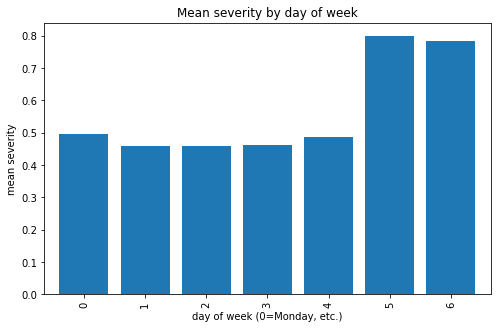

In [147]:
df_day_sev_group['Severity'].plot(kind='bar', width=0.8, figsize=(8, 5))

plt.title('Mean severity by day of week')
plt.ylabel('mean severity')
plt.xlabel('day of week (0=Monday, etc.)')

plt.show()

<p>But while weekdays (Mon-Fri) account for most of the accidents, the more severe accidents happen on Saturday and Sunday (on average), as seen in the table above.</p>

In [41]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)

In [42]:
df['weekend'].value_counts()

0    37599
1     4497
Name: weekend, dtype: int64

In [43]:
df_wend_sev_group = df[['weekend', 'Severity']]
df_wend_sev_group = df_wend_sev_group.groupby(['weekend'],as_index=False).mean()
df_wend_sev_group

,weekend,Severity
0,0,0.472060
1,1,0.792973


<p>After creating a dummy variable for if an accident occured on a weekday or a weekend, we see the average severity of accidents on the weekend is nearly twice that of those during the work week.</p>

In [44]:
pearson_coef, p_value = stats.pearsonr(df['weekend'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.19827162217506777  with a P-value of P = 0.0


In [45]:
pearson_coef, p_value = stats.pearsonr(df['dayofweek'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1202145772308435  with a P-value of P = 2.8161064281148807e-135


<p>Both 'dayofweek' and 'weekend' are statistically significant, but 'weekend' is more highly positively correlated with 'Severity'.</p><br>
<p>Next, I explore the time of day the accidents occur.</p>

In [46]:
df['start'].describe()

count                   42096
unique                  37815
top       2018-05-31 11:41:47
freq                        8
first     2016-06-17 13:19:34
last      2020-06-29 13:18:20
Name: start, dtype: object

In [52]:
df['start_hour'] = df['start'].dt.hour

In [57]:
hour_count = df['start_hour'].value_counts().to_frame()

In [62]:
hour_count

,start_hour
17,3292
7,3274
16,3241
15,2943
8,2866
18,2766
6,2611
14,2554
9,2530
13,2273


In [68]:
hour_count.rename(columns={'start_hour': 'total_accidents'}, inplace=True)
hour_count

,total_accidents
17,3292
7,3274
16,3241
15,2943
8,2866
18,2766
6,2611
14,2554
9,2530
13,2273


In [69]:
hour_count.index.name = 'hour'
hour_count

,total_accidents
hour,
17,3292
7,3274
16,3241
15,2943
8,2866
18,2766
6,2611
14,2554
9,2530


In [71]:
hour_count = hour_count.sort_values('hour')

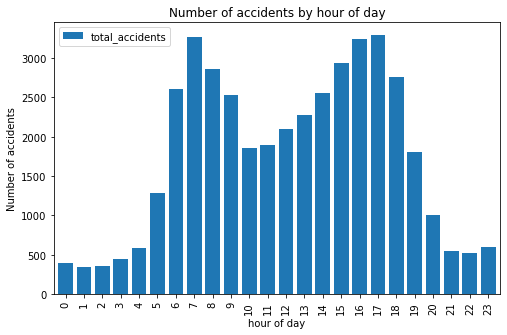

In [72]:
hour_count.plot(kind='bar', width=0.8, figsize=(8, 5))

plt.title('Number of accidents by hour of day')
plt.ylabel('Number of accidents')
plt.xlabel('hour of day')

plt.show()

<p>As seen in the figure above, most accidents happen during commuting hours, implying that more cars on the road could equate to more accidents.</p>

In [75]:
df_hr_sev_group = df[['start_hour', 'Severity']]
df_hr_sev_group = df_hr_sev_group.groupby(['start_hour'],as_index=False).mean()
df_hr_sev_group

,start_hour,Severity
0,0,0.742424
1,1,0.771930
2,2,0.767313
3,3,0.823009
4,4,0.654110
5,5,0.573655
6,6,0.469169
7,7,0.441662
8,8,0.420098
9,9,0.435968


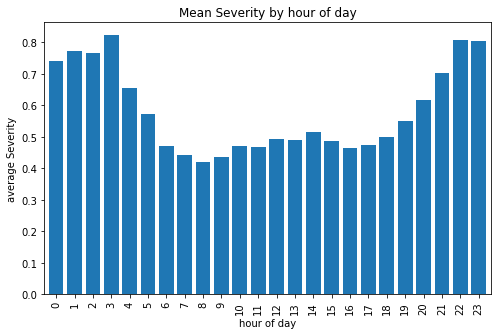

In [78]:
df_hr_sev_group['Severity'].plot(kind='bar', width=0.8, figsize=(8, 5))

plt.title('Mean Severity by hour of day')
plt.ylabel('average Severity')
plt.xlabel('hour of day')

plt.show()

<p>But while most accidents happen during daylight hours, the more severe accidents happen at night (on average).</p>

In [55]:
pearson_coef, p_value = stats.pearsonr(df['start_hour'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.021640865355963913  with a P-value of P = 8.974530476614274e-06


<h3>Exploring other variables</h3><br>
<h4>Day vs. Night</h4>

In [79]:
df['Sunrise_Sunset'].replace(to_replace=['Day','Night'], value=[0,1],inplace=True)
df['Civil_Twilight'].replace(to_replace=['Day','Night'], value=[0,1],inplace=True)
df['Nautical_Twilight'].replace(to_replace=['Day','Night'], value=[0,1],inplace=True)
df['Astronomical_Twilight'].replace(to_replace=['Day','Night'], value=[0,1],inplace=True)

In [148]:
df_ss_sev_group = df[['Sunrise_Sunset', 'Severity']]
df_ss_sev_group = df_ss_sev_group.groupby(['Sunrise_Sunset'],as_index=False).mean()
df_ss_sev_group

,Sunrise_Sunset,Severity
0,0,0.476862
1,1,0.594774


In [149]:
df_ct_sev_group = df[['Civil_Twilight', 'Severity']]
df_ct_sev_group = df_ct_sev_group.groupby(['Civil_Twilight'],as_index=False).mean()
df_ct_sev_group

,Civil_Twilight,Severity
0,0,0.476159
1,1,0.624577


In [150]:
df_nt_sev_group = df[['Nautical_Twilight', 'Severity']]
df_nt_sev_group = df_nt_sev_group.groupby(['Nautical_Twilight'],as_index=False).mean()
df_nt_sev_group

,Nautical_Twilight,Severity
0,0,0.476446
1,1,0.664033


In [151]:
df_at_sev_group = df[['Astronomical_Twilight', 'Severity']]
df_at_sev_group = df_at_sev_group.groupby(['Astronomical_Twilight'],as_index=False).mean()
df_at_sev_group

,Astronomical_Twilight,Severity
0,0,0.477859
1,1,0.707607


In [152]:
pearson_coef, p_value = stats.pearsonr(df['Sunrise_Sunset'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.10212681903527117  with a P-value of P = 5.542131571978836e-98


In [153]:
pearson_coef, p_value = stats.pearsonr(df['Civil_Twilight'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.11948685579285154  with a P-value of P = 1.174795276567532e-133


In [154]:
pearson_coef, p_value = stats.pearsonr(df['Nautical_Twilight'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1373340293527533  with a P-value of P = 2.5560312502864433e-176


In [155]:
pearson_coef, p_value = stats.pearsonr(df['Astronomical_Twilight'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1514423280051958  with a P-value of P = 2.138946262999781e-214


<h4>Weather Conditions</h4>

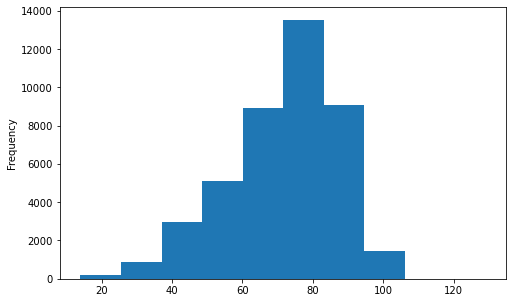

In [88]:
df['Temperature(F)'].plot(kind='hist', figsize=(8, 5))

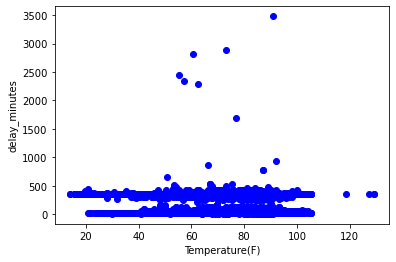

In [89]:
plt.scatter(df['Temperature(F)'], df['delay_minutes'],  color='blue')
plt.xlabel("Temperature(F)")
plt.ylabel("delay_minutes")
plt.show()

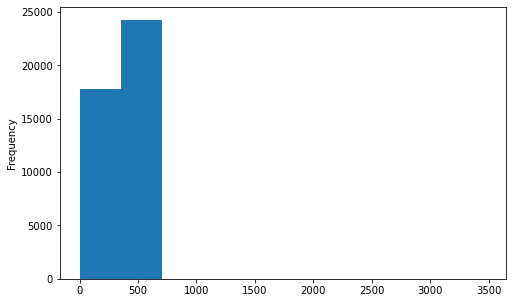

In [90]:
df['delay_minutes'].plot(kind='hist', figsize=(8, 5))

In [91]:
pearson_coef, p_value = stats.pearsonr(df['Temperature(F)'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.027827043515055976  with a P-value of P = 1.1277927501433087e-08


In [92]:
df["Precipitation(in)"].replace(np.nan, 0, inplace=True)
df['Precipitation(in)'].describe()

count    42096.000000
mean         0.006523
std          0.050817
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.310000
Name: Precipitation(in), dtype: float64

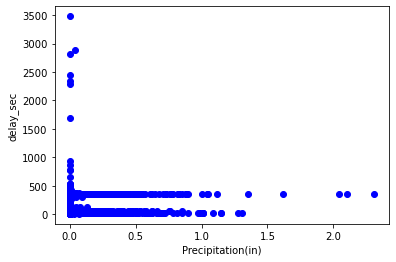

In [93]:
plt.scatter(df['Precipitation(in)'], df['delay_minutes'],  color='blue')
plt.xlabel("Precipitation(in)")
plt.ylabel("delay_sec")
plt.show()

In [94]:
df['delay_minutes'].value_counts()

360.000000     23947
15.000000       1916
30.000000       1617
60.000000        966
45.000000        792
               ...  
405.383333         1
30.083333          1
299.033333         1
3480.000000        1
480.000000         1
Name: delay_minutes, Length: 873, dtype: int64

<p>It seems that the majority of accidents recorded cause delays of 6 hours</p>

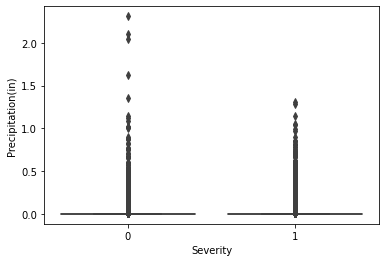

In [95]:
sns.boxplot(x='Severity', y='Precipitation(in)', data=df)

In [96]:
df_rain_sev_group = df[['Precipitation(in)', 'Severity']]
df_rain_sev_group = df_rain_sev_group.groupby(['Severity'],as_index=False).mean()
df_rain_sev_group

,Severity,Precipitation(in)
0,0,0.005792
1,1,0.007235


In [97]:
pearson_coef, p_value = stats.pearsonr(df['Precipitation(in)'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.014201533476721366  with a P-value of P = 0.0035702081702961705


<p>Rain is weakly correlated with Severity and weakly statistically significant.</p>

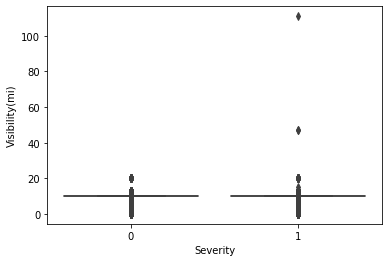

In [98]:
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)

In [99]:
pearson_coef, p_value = stats.pearsonr(df['Visibility(mi)'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.03243535395966497  with a P-value of P = 2.8058594747925288e-11


<p>Visibility is statistically significant</p>

<h4>Investigating POIs</h4>

In [100]:
df['Amenity'].value_counts()

False    41933
True       163
Name: Amenity, dtype: int64

In [101]:
df_amenity_group = df[['Amenity', 'Severity']]
df_amenity_group = df_amenity_group.groupby(['Amenity'],as_index=False).mean()
df_amenity_group

,Amenity,Severity
0,False,0.507572
1,True,0.190184


In [102]:
pearson_coef, p_value = stats.pearsonr(df['Amenity'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.039426277189377905  with a P-value of P = 5.863639519795824e-16


<p>Amenity is statistically significant</p>

In [103]:
df['Bump'].value_counts() 

False    42095
True         1
Name: Bump, dtype: int64

<p>There is only 1 bump in Texas data</p>

In [104]:
df['Crossing'].value_counts() 

False    41109
True       987
Name: Crossing, dtype: int64

In [105]:
df_cross_group = df[['Crossing', 'Severity']]
df_cross_group = df_cross_group.groupby(['Crossing'],as_index=False).mean()
df_cross_group

,Crossing,Severity
0,False,0.510424
1,True,0.336373


In [106]:
pearson_coef, p_value = stats.pearsonr(df['Crossing'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.05267770191119814  with a P-value of P = 2.9154342240642222e-27


In [107]:
df['Give_Way'].value_counts() 

False    41992
True       104
Name: Give_Way, dtype: int64

In [108]:
df_gw_group = df[['Give_Way', 'Severity']]
df_gw_group = df_gw_group.groupby(['Give_Way'],as_index=False).mean()
df_gw_group

,Give_Way,Severity
0,False,0.506263
1,True,0.538462


In [109]:
pearson_coef, p_value = stats.pearsonr(df['Give_Way'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.0031971197293017917  with a P-value of P = 0.5118594124273923


In [110]:
df['Junction'].value_counts() 

False    32765
True      9331
Name: Junction, dtype: int64

In [111]:
df_junc_group = df[['Junction', 'Severity']]
df_junc_group = df_junc_group.groupby(['Junction'],as_index=False).mean()
df_junc_group

,Junction,Severity
0,False,0.492385
1,True,0.555353


In [112]:
pearson_coef, p_value = stats.pearsonr(df['Junction'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05231339352944298  with a P-value of P = 6.580416217497338e-27


In [113]:
df['No_Exit'].value_counts() 

False    42086
True        10
Name: No_Exit, dtype: int64

In [114]:
df['Railway'].value_counts() 

False    41965
True       131
Name: Railway, dtype: int64

In [115]:
df_rw_group = df[['Railway', 'Severity']]
df_rw_group = df_rw_group.groupby(['Railway'],as_index=False).mean()
df_rw_group

,Railway,Severity
0,False,0.506565
1,True,0.435115


In [116]:
pearson_coef, p_value = stats.pearsonr(df['Railway'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.007959917899801758  with a P-value of P = 0.10243989486500629


In [117]:
df['Roundabout'].value_counts() 

False    42096
Name: Roundabout, dtype: int64

In [118]:
df['Station'].value_counts() 

False    41987
True       109
Name: Station, dtype: int64

In [119]:
df_stat_group = df[['Station', 'Severity']]
df_stat_group = df_stat_group.groupby(['Station'],as_index=False).mean()
df_stat_group

,Station,Severity
0,False,0.507181
1,True,0.183486


In [120]:
pearson_coef, p_value = stats.pearsonr(df['Station'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.03290259688127032  with a P-value of P = 1.4546407603803208e-11


In [121]:
df['Stop'].value_counts() 

False    42008
True        88
Name: Stop, dtype: int64

In [122]:
df_stop_group = df[['Stop', 'Severity']]
df_stop_group = df_stop_group.groupby(['Stop'],as_index=False).mean()
df_stop_group

,Stop,Severity
0,False,0.506761
1,True,0.306818


In [123]:
pearson_coef, p_value = stats.pearsonr(df['Stop'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.018265704455550844  with a P-value of P = 0.00017836929025708524


In [124]:
df['Traffic_Calming'].value_counts() 

False    42090
True         6
Name: Traffic_Calming, dtype: int64

In [125]:
df['Traffic_Signal'].value_counts() 

False    38094
True      4002
Name: Traffic_Signal, dtype: int64

In [126]:
df_ts_group = df[['Traffic_Signal', 'Severity']]
df_ts_group = df_ts_group.groupby(['Traffic_Signal'],as_index=False).mean()
df_ts_group

,Traffic_Signal,Severity
0,False,0.530687
1,True,0.274613


In [127]:
pearson_coef, p_value = stats.pearsonr(df['Traffic_Signal'], df['Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.15023024159334772  with a P-value of P = 5.672636402022375e-211


<h2>Creating the Feature Set</h2>

In [128]:
df.dtypes

Source                            object
Severity                           int64
Start_Time                        object
End_Time                          object
Start_Lat                        float64
Start_Lng                        float64
End_Lat                          float64
End_Lng                          float64
Distance(mi)                     float64
County                            object
State                             object
Zipcode                           object
Temperature(F)                   float64
Humidity(%)                      float64
Visibility(mi)                   float64
Wind_Speed(mph)                  float64
Precipitation(in)                float64
Weather_Condition                 object
Amenity                             bool
Bump                                bool
Crossing                            bool
Give_Way                            bool
Junction                            bool
No_Exit                             bool
Railway         

In [129]:
df[["Amenity","Bump","Crossing","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal"]] = df[["Amenity","Bump","Crossing","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal"]].astype("float")

In [130]:
df[["Severity"]] = df[["Severity"]].astype("int")

In [131]:
df.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'County', 'State',
       'Zipcode', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'start', 'end', 'delay', 'delay_minutes',
       'dayofweek', 'weekend', 'start_clock', 'start_hour'],
      dtype='object')

In [133]:
X = np.asarray(df[['weekend', 'start_hour', 'delay_minutes', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 'Amenity', 'Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal']])
X[0:5]

array([[  0. ,  15. , 360. ,  61. ,  10. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ],
       [  0. ,  15. , 360. ,  61. ,  10. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [  0. ,  15. , 360. ,  60.8,  10. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ],
       [  0. ,  16. , 360. ,  61. ,  10. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ],
       [  0. ,  16. , 360. ,  61. ,  10. ,   0. ,   0. ,   1. ,   0. ,
          0. ,   0. ,   1. ]])

In [134]:
y = np.asarray(df['Severity'])

In [135]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.34583847,  0.52285629,  0.82817484, -0.69272158,  0.31414719,
        -0.12835894, -0.06234704, -0.15494948,  1.87387661, -0.05095137,
        -0.04576941, -0.3241233 ],
       [-0.34583847,  0.52285629,  0.82817484, -0.69272158,  0.31414719,
        -0.12835894, -0.06234704, -0.15494948, -0.53365307, -0.05095137,
        -0.04576941, -0.3241233 ],
       [-0.34583847,  0.52285629,  0.82817484, -0.70557781,  0.31414719,
        -0.12835894, -0.06234704, -0.15494948, -0.53365307, -0.05095137,
        -0.04576941, -0.3241233 ],
       [-0.34583847,  0.71717044,  0.82817484, -0.69272158,  0.31414719,
        -0.12835894, -0.06234704, -0.15494948,  1.87387661, -0.05095137,
        -0.04576941, -0.3241233 ],
       [-0.34583847,  0.71717044,  0.82817484, -0.69272158,  0.31414719,
        -0.12835894, -0.06234704,  6.45371644, -0.53365307, -0.05095137,
        -0.04576941,  3.08524564]])

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (33676, 12) (33676,)
Test set: (8420, 12) (8420,)


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [138]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, ..., 0, 0, 0])

In [139]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.42001416, 0.57998584],
       [0.59534947, 0.40465053],
       [0.3644783 , 0.6355217 ],
       ...,
       [0.81555358, 0.18444642],
       [0.57306082, 0.42693918],
       [0.54649132, 0.45350868]])

<h2>Evaluation</h2>

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      4203
           1       0.66      0.55      0.60      4217

    accuracy                           0.63      8420
   macro avg       0.64      0.63      0.63      8420
weighted avg       0.64      0.63      0.63      8420



<p>Based on the classification report above, the logistic regression model was more accurate at predicting more severe accidents (where Severity = 1) than those that were less severe (where Severity = 0), for the test data, as given by the precision score. However, the true positive rate (given by recall) of the less severe accidents was higher. The f-1 score is slightly higher for the less severe accidents, but overall, the model was successful at predicting over half of the outcomes successfully.</p>

In [143]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2306 1911]
 [1178 3025]]


Confusion matrix, without normalization
[[2306 1911]
 [1178 3025]]


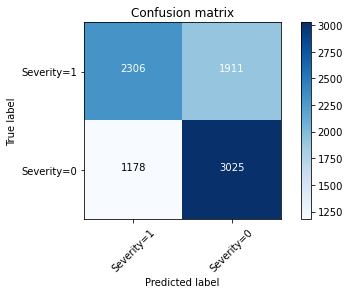

In [145]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix')

<p>The confusion matricx (above figure) plots the true label of the test data against the predicted label, and echos the classification table.</p>

In [142]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6438293483405915

<p>Finally, the log loss of the model is given in the cell above, indicating that there is certainly room for improvement in constructing the model.</p>